## Supervised Learning
#### by **Ivan Alducin**
<p><img src="https://preview.redd.it/rfgtsej8fhv71.jpg?auto=webp&s=99a5d000ff2baaac79a8d15c7135c3677f105159" width="1000"></p>

## Exploratory Data Analysis
<p>Vamos a trabajar con el conjunto de datos de <code>Heart Attack</code>, el objetivo es predecir bajo que escenario es más probable que un paciente pueda tener un ataque al corazón  Un experto en medicina cardiovasuclar puede predecir esto sin hacer uso de <i>Machine Learning</i>, pero probablemente no instantáneamente, ¡y ciertamente no si estamos tratando con cientos o miles de muestras!.
    
A continuación una breve explicación de las variables del dataset:
    
- <b>age:</b> Age of the patient
- <b>sex:</b> Sex of the patient
- <b>cp:</b> Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- <b>trtbps:</b> Resting blood pressure (in mm Hg)
- <b>chol:</b> Cholestoral in mg/dl fetched via BMI sensor
- <b>fbs:</b> (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- <b>restecg:</b> Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- <b>thalachh:</b> Maximum heart rate achieved
- <b>oldpeak:</b> Previous peak
- <b>slp:</b> Slope
- <b>caa:</b> Number of major vessels
- <b>thall:</b> Thalium Stress Test result ~ (0,3)
- <b>exng:</b> Exercise induced angina ~ 1 = Yes, 0 = No
- <b>output:</b>  Target variable</p>

In [5]:
# Archivo Heart Attack.csv - ¿Cuales son los factores que pueden incrementar o disminuir la probabilidad de un ataque al corazón?

import pandas as pd
import numpy as np

df = pd.read_csv('Heart Attack.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
%pip install dataprep

In [9]:
# Hacer EDA (Exploratory Data Analysis) suele ser un tanto laborioso dependiendo del detalle al que se quiera llevar, pero prueba la siguiente librería, puede que a partir de ahora, tu EDA sea más fácil ;)

from dataprep.eda import create_report

create_report(df)

error happended in column:restecg


KeyboardInterrupt: 

## k-Nearest Neighbors
<p>Habiendo hecho un Análisis Exploratorio de los factores que pueden o no tener más posibilidad de un ataque al corazón, es hora de crear tu primer clasificador!!! usando el algoritmo de k-NN.
    
<b>Nota</b>: es importante garantizar que los datos esten en el formato requerido por la librería de <code>scikit-learn</code>. La información debe estar en una matriz en la que cada columna sea una variable y cada fila una observación diferente, en este caso, el registro de análisis clinico por paciente. Y la variable objetivo debe ser una sola columna con el mismo número de observaciones.</p>

In [7]:
# Importa la librería para un clasificador k-NN de sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crea dos arreglos "X", "y" que contengan los valores de las variables independientes y la variable objetivo
cols_name = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[cols_name].values
y = df.output.values

# Crea un clasificador k-NN con 6 vecinos
knn = KNeighborsClassifier(n_neighbors=6)

# Ajusta el clasificador a las variables
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

## Predicción
<p>Una vez que entrenamos al clasificador k-NN, ahora lo podemos usar para predecir un nuevo registro. Para este caso,  no hay datos sin clasificar disponibles ya que todos se usaron para entrenar al modelo. Para poder calcular una predicción, vamos a usar el método <code>.predict()</code> pero, para esto vamos a simular una observación completamente nueva</p>

In [8]:
# Crea un arreglo simulando una observación
X_new = {'age': 40,'sex': 0 ,'cp': 3 ,'trtbps': 150 ,'chol': 210 ,'fbs': 1 ,'restecg': 0 ,'thalachh': 165 ,'exng': 1 ,'oldpeak': 2.1 ,'slp': 1 ,'caa': 1,'thall': 2}
X_new_array = np.array([[X_new['age'],X_new['sex'],X_new['cp'],X_new['trtbps'],X_new['chol'],X_new['fbs'],
                        X_new['restecg'],X_new['thalachh'],X_new['exng'],X_new['oldpeak'],X_new['slp'],X_new['caa'],X_new['thall']]])

# Predice la clasificación para el arreglo que creaste
y_new_pred = knn.predict(X_new_array)
if  y_new_pred == 0:
    print("No tiene riesgo de ataque al corazón")
else:
    print("Tiene riesgo de ataque al corazón")
print("Prediction: {}".format(y_new_pred))

Tiene riesgo de ataque al corazón
Prediction: [1]


## Reconocimiento de digitos
<p>Hasta ahora, solo hemos realizado una clasificación binaria, ya que la variable objetivo tenía dos resultados posibles. En los siguientes ejercicios, trabajarás con el conjunto de datos de reconocimiento de dígitos MNIST, que tiene 10 clases, ¡los dígitos del 0 al 9! Una versión reducida del conjunto de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> es uno de los conjuntos de datos incluidos en <code>scikit-learn</code>

Cada muestra de este conjunto de datos es una imagen de 28x28 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 1 a 784, lo que indica niveles variables de negro.

<p><img src="https://miro.medium.com/max/1400/1*hVdoiW35FXUE-fZ0HI30Tw.jpeg" width="350"></p>

In [10]:
# Importa el archivo de MNIST
digits = pd.read_csv('MNIST.csv')
digits.head(10)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Crea una variable 'cols' para hacer referencia a todas las columnas que contienen la palabra 'pixel'
cols = [col for col in digits.columns if 'pixel' in col]

El número es: 8


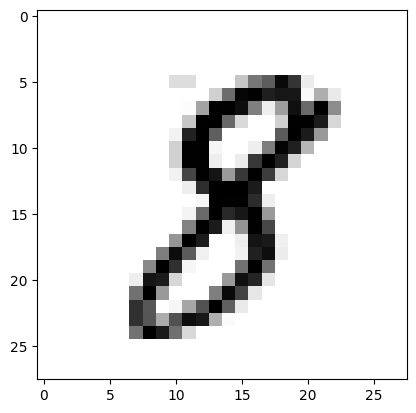

In [12]:
import matplotlib.pyplot as plt

# Vamos a imprimir un digito
i = 20
print("El número es:", digits.loc[i, 'label'])
plt.imshow(digits.loc[i, cols].values.reshape((28,28)).astype(float), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test
<p>Una de las principales diferencias entre la Estadística Clasica y el <i>Machine Learning</i> es la división del conjunto de datos en conjuntos de entrenamiento y prueba, con el objetivo de medir y cuantificar la precisión y el nivel de error en los datos que de alguna manera el modelo <i>"No ha visto"</i>. A continuación crearemos nuestros conjuntos de entrenamiento y prueba con el método <code>train_test_split</code> y mediremos cual es el nivel de precisión de nuestro modelo. El objetivo es <b>predecir cual es el digito dada una imagen</b>!!!. Para lo cual entrenaremos un clasificador <i>k-NN</i> a los datos de entrenamiento y luego calcularemos su precisión usando el método <code>accuracy_score()</code> en los datos de prueba ¿Como crees que en un modelo de Clasificación se calcule su precisión?. Parece bastante dificil, pero no lo es ;)</p>

In [13]:
# Importa la librería para entrenamiento y prueba de datos y la librería para calcular la precisión
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Crea los arreglos para las variables independientes y la variable objetivo
X = digits.drop(['label'], axis=1)
y = digits['label'].values

# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Instancia un clasificador k-NN con 14 vecinos
knn = KNeighborsClassifier(n_neighbors=14)

# Ajusta (Entrenamiento) el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Verificar la precisión del modelo
print(accuracy_score(y_test, y_pred))

0.9607142857142857


## Reconocimiento de tu imagen
<p>Con todo lo anterior, podemos hacer el reconocimiento de cualquier digito que dibujes, ¿Estás list@?</p>

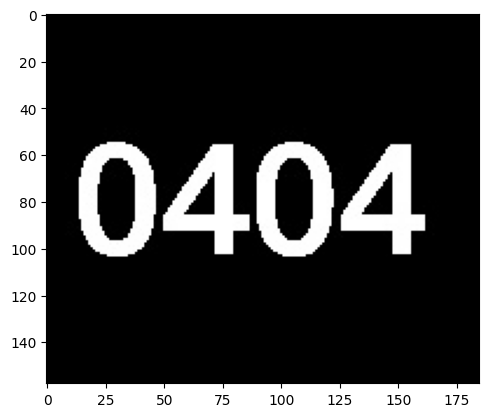

In [16]:
# Vamos a visualizar la imagen de un número que vas a crear en tu computador con la aplicación de paint, ésta imagen debe de tener un fondo negro y ser pintada en blanco, encontrarás un ejemplo en el repositorio
image = plt.imread('numero.jpg') # Coloca aquí la ruta de la imagen que hayas creado en formato jpg o png
plt.imshow(image)

In [17]:
# Con esta libreria transformaremos la imagen creada a un formato de 28x28 pixeles
from PIL import Image
pil = Image.open('numero.jpg')
image_resize = pil.resize((28, 28))

# Vamos transformar la nueva imagen en un array donde se almacenara la información de los pixeles
pixels = np.asarray(image_resize)

In [18]:
# Necesitamos hacer algunas configuraciones a la imagen debido al formato de datos que esta alimentando al modelo y a la configuración de sklearn
arr = pixels.transpose(2, 0, 1).reshape(-1, pixels.shape[1])[0:28]

image_final = arr.ravel().reshape(1, -1)

El número es: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


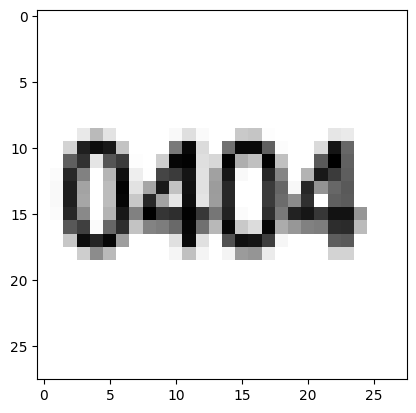

In [19]:
# Calcula la predicción del modelo con el número que creaste, ¿Fue la clasificación correcta? :O
knn_pred = knn.predict(image_final)
print("El número es:", knn_pred)
plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')

## Overfit and Underfit
<p>¿Cual es mi numero ideal para elegir el parametro <i>k</i>? Vamos a calcular los valores de precisión para los conjuntos e entrenamiento y prueba para una rango de valores k. Al observar cómo difieren estos valores podremos observar cual es el mejor parametro sin caer en un <i>Overfit</i> o un <i>Underfit</i>.</p>

In [21]:
# Coniguración de arreglos iniciales
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop para diferentes valores de k
for i, k in enumerate(neighbors):
    # Clasificador k-NN para el parametro k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Ajuste del clasificador al dataset de entrenamiento
    knn.fit(X_train, y_train)

    # Calculo de precision sobre el dataset de entrenamiento
    train_accuracy[i] = knn.score(X_train, y_train)

    # Calculo de precision sobre el dataset de prueba
    test_accuracy[i] = knn.score(X_test, y_test)

# Grafico para encontrar un valor optimo de k
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.title('k-NN: by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyboardInterrupt: 

## Regresión Logística
<p>Haz la predicción de tu imagen, pero esta vez por medio de una Regresión Logística, ¿Cuál de los dos modelos te da mejores resultados?</p>

In [22]:
from sklearn.linear_model import LogisticRegression

# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 1)

lb= LogisticRegression(solver = 'lbfgs')

# Ajusta (Entrenamiento) el clasificador en el conjunto de entrenamiento
lb.fit(X_train, y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred = lb.predict(X_test)

# Verificar la precisión del modelo
print(accuracy_score(y_test, y_pred))

0.9192857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
